In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
# Step 1: Load Data
df = pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\ML project\data_set\heart_disease_dataset.csv')
print("Initial Data:\n", df.head())

Initial Data:
    age  gender  cholesterol  blood_pressure  heart_rate  smoking  \
0   75  Female          228             119          66  Current   
1   48    Male          204             165          62  Current   
2   53    Male          234              91          67    Never   
3   69  Female          192              90          72  Current   
4   62  Female          172             163          93    Never   

  alcohol_intake  exercise_hours family_history diabetes obesity  \
0          Heavy               1             No       No     Yes   
1            NaN               5             No       No      No   
2          Heavy               3            Yes       No     Yes   
3            NaN               4             No      Yes      No   
4            NaN               6             No      Yes      No   

   stress_level  blood_sugar exercise_induced_angina  heart_disease  
0             8          119                     Yes              1  
1             9           7

In [30]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 age                          0
gender                       0
cholesterol                  0
blood_pressure               0
heart_rate                   0
smoking                      0
alcohol_intake             340
exercise_hours               0
family_history               0
diabetes                     0
obesity                      0
stress_level                 0
blood_sugar                  0
exercise_induced_angina      0
heart_disease                0
dtype: int64


In [31]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print("Encoded Data:\n", df.head())

Encoded Data:
    age  gender  cholesterol  blood_pressure  heart_rate  smoking  \
0   75       0          228             119          66        0   
1   48       1          204             165          62        0   
2   53       1          234              91          67        2   
3   69       0          192              90          72        0   
4   62       0          172             163          93        2   

   alcohol_intake  exercise_hours  family_history  diabetes  obesity  \
0               0               1               0         0        1   
1               2               5               0         0        0   
2               0               3               1         0        1   
3               2               4               0         1        0   
4               2               6               0         1        0   

   stress_level  blood_sugar  exercise_induced_angina  heart_disease  
0             8          119                        1              1  
1

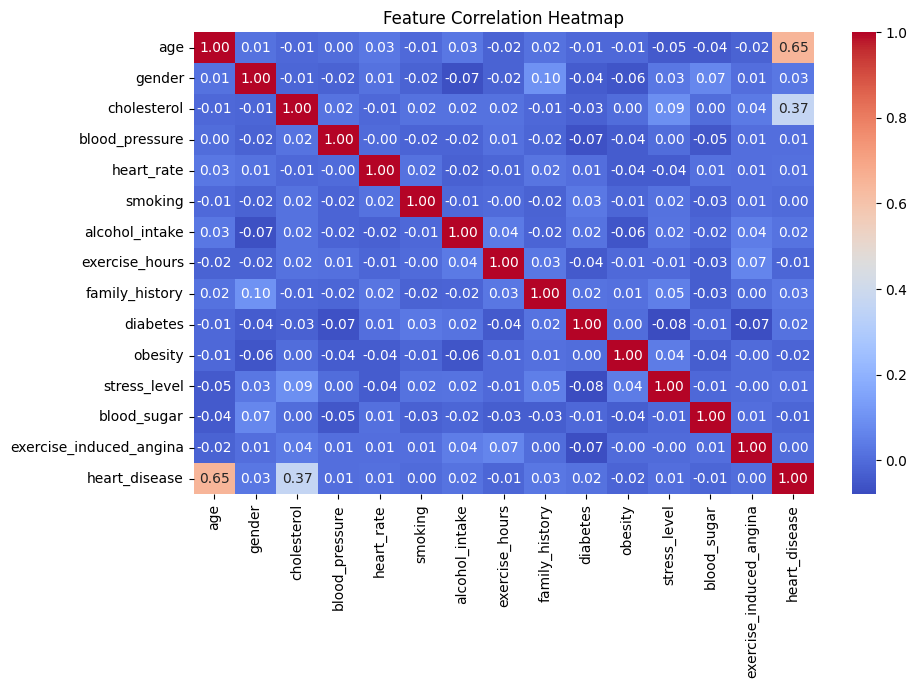

In [32]:
# Heatmap of Feature Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

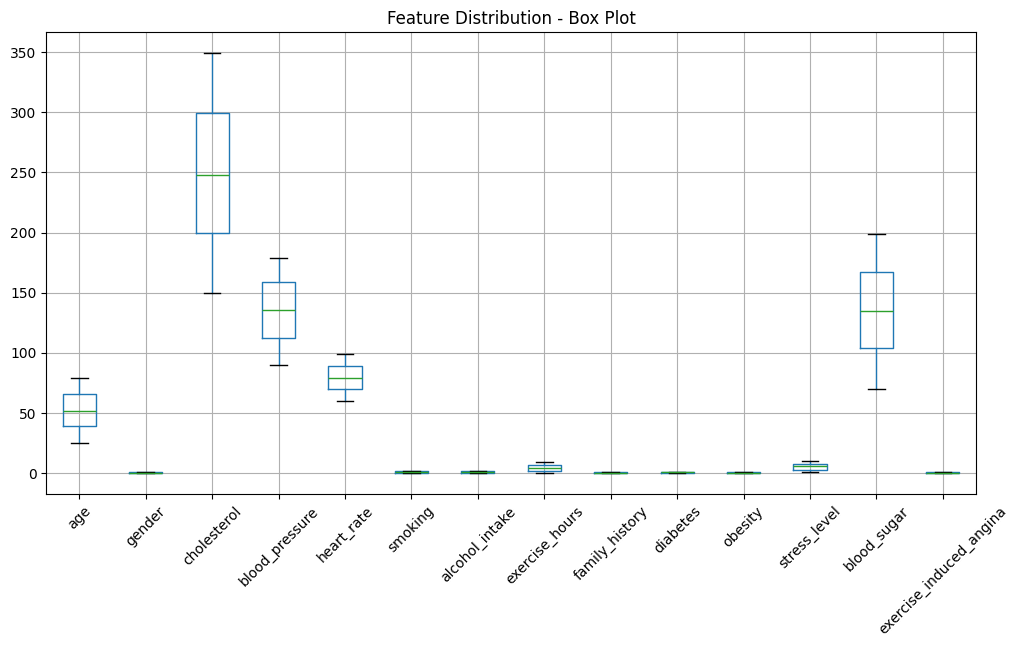

In [33]:
# Boxplot of Numerical Features
plt.figure(figsize=(12, 6))
df.drop(columns=['heart_disease']).boxplot(rot=45)
plt.title("Feature Distribution - Box Plot")
plt.show()

In [34]:
# Split Data
X = df.drop(columns=['heart_disease'])
y = df['heart_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [35]:
# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary to store model results
model_results = {}
# Helper function to evaluate models
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)  # Get predicted probabilities
    y_pred = (y_pred > 0.5).astype("int32").flatten()  # Convert probabilities to binary (0 or 1)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    model_results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}

    # Print scores
    print(f"\n📌 {name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()




📌 Logistic Regression Performance:
Accuracy: 0.8225
Precision: 0.8312
Recall: 0.7399
F1 Score: 0.7829


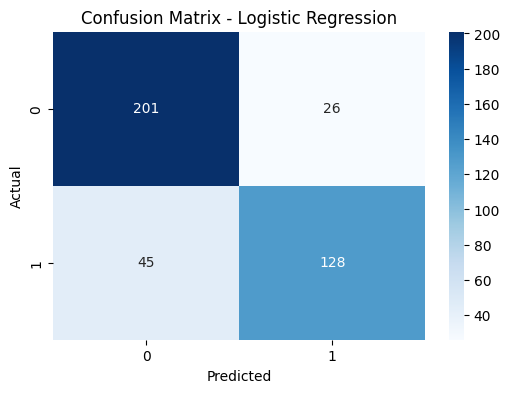

In [37]:
# 1️⃣ Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
evaluate_model('Logistic Regression', log_reg, X_test, y_test)


📌 Decision Tree Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


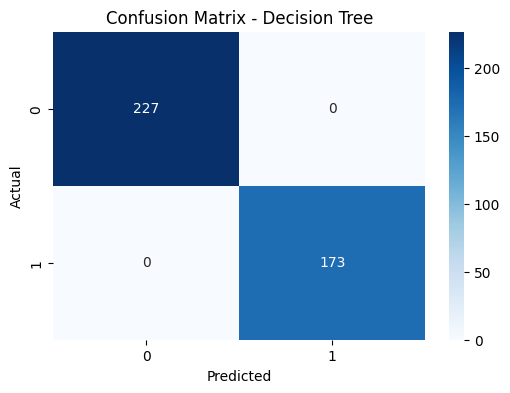

In [38]:
# 2️⃣ Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
evaluate_model('Decision Tree', tree, X_test, y_test)


📌 Random Forest Performance:
Accuracy: 0.9975
Precision: 1.0000
Recall: 0.9942
F1 Score: 0.9971


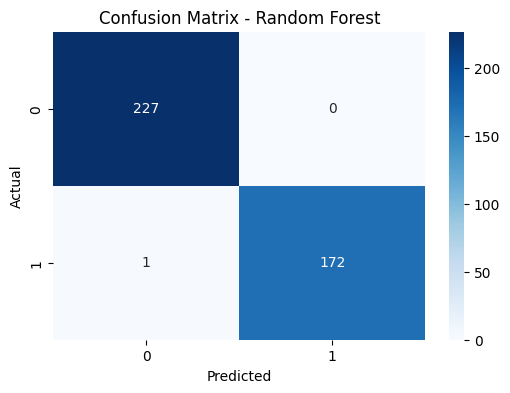

In [39]:
# 3️⃣ Random Forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
evaluate_model('Random Forest', rf, X_test, y_test)


📌 SVM Performance:
Accuracy: 0.8200
Precision: 0.8389
Recall: 0.7225
F1 Score: 0.7764


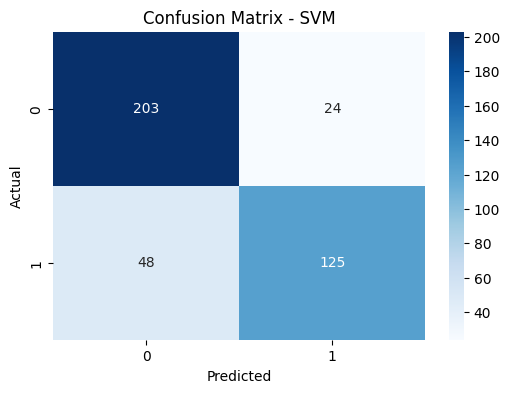

In [40]:
# 4️⃣ Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
evaluate_model('SVM', svm, X_test, y_test)


📌 XG Boost Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


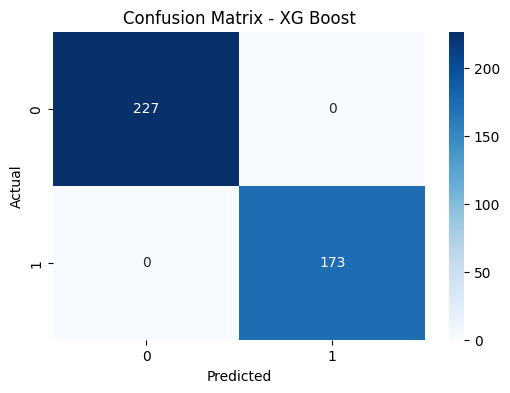

In [41]:
# XG Boost
xgb = GradientBoostingClassifier()
xgb.fit(X_train, y_train)
evaluate_model('XG Boost', xgb, X_test, y_test)

In [42]:
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train) / len(X) * 100:.2f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test) / len(X) * 100:.2f}%)")

Total samples: 1000
Training samples: 600 (60.00%)
Testing samples: 400 (40.00%)


c:\Users\Dell\OneDrive\Desktop\ML project\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

📌 ANN Performance:
Accuracy: 0.9025
Precision: 0.9467
Recall: 0.8208
F1 Score: 0.8793


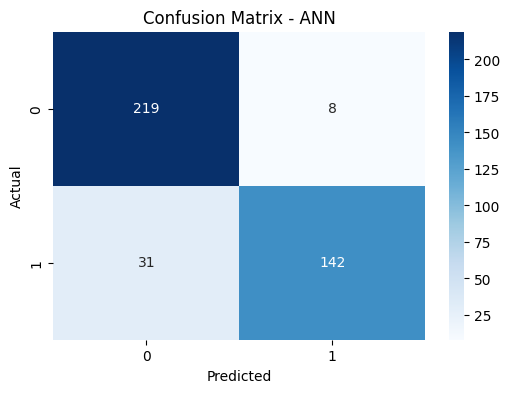

In [43]:
# Artificial Neural Network (ANN)
ann = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
ann_pred = (ann.predict(X_test) > 0.5).astype("int32").flatten()
evaluate_model('ANN', ann, X_test, y_test)

### Saving the model

In [44]:
# Convert model results to DataFrame
results_df = pd.DataFrame(model_results).T
print("\nModel Results:\n", results_df)
#.T means transpose


Model Results:
                      Accuracy  Precision    Recall  F1 Score
Logistic Regression    0.8225   0.831169  0.739884  0.782875
Decision Tree          1.0000   1.000000  1.000000  1.000000
Random Forest          0.9975   1.000000  0.994220  0.997101
SVM                    0.8200   0.838926  0.722543  0.776398
XG Boost               1.0000   1.000000  1.000000  1.000000
ANN                    0.9025   0.946667  0.820809  0.879257


In [45]:
# Print Model Performance Table
print("\n📊 Model Performance Summary:")
print(results_df)


📊 Model Performance Summary:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression    0.8225   0.831169  0.739884  0.782875
Decision Tree          1.0000   1.000000  1.000000  1.000000
Random Forest          0.9975   1.000000  0.994220  0.997101
SVM                    0.8200   0.838926  0.722543  0.776398
XG Boost               1.0000   1.000000  1.000000  1.000000
ANN                    0.9025   0.946667  0.820809  0.879257


C:\Users\Dell\AppData\Local\Temp\ipykernel_2692\726310699.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x=results_df.index, y="Accuracy", palette="coolwarm")


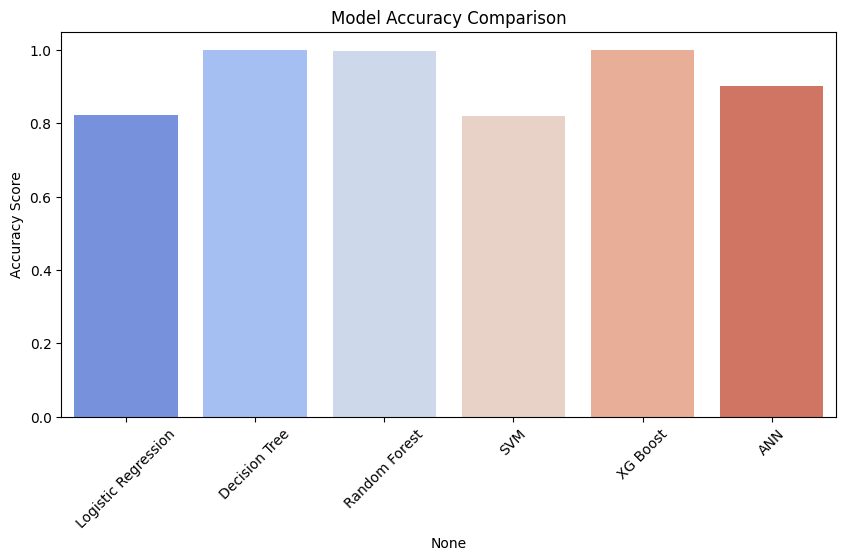

In [46]:
# Bar plot to compare model accuracy
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x=results_df.index, y="Accuracy", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()

In [47]:
import joblib
#Saving the best_model so that it can be used as backend
joblib.dump(ann, 'heart_model.pkl')  
print("Model saved as 'heart_model.pkl'")


Model saved as 'heart_model.pkl'


In [48]:
# Load the model
model = joblib.load('heart_model.pkl')
print("Model Loaded Successfully!")


Model Loaded Successfully!


In [49]:
df['heart_disease'].value_counts()


heart_disease
0    608
1    392
Name: count, dtype: int64

KeyError: 'Gender'

In [51]:
label_mappings = {
    col: {index: value for index, value in enumerate(sorted(df[col].unique()))} 
    for col in categorical_columns_notebook
}
label_mappings["Gender"]
print(label_mappings["Gender"])

print(df[["Gender"]].head(10))
print(df[["Alcohol Intake"]].head(10))


KeyError: 'Gender'

In [ ]:
print(df.head())  


   Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0   75       0          228             119          66        0   
1   48       1          204             165          62        0   
2   53       1          234              91          67        2   
3   69       0          192              90          72        0   
4   62       0          172             163          93        2   

   Alcohol Intake  Exercise Hours  Family History  Diabetes  Obesity  \
0               0               1               0         0        1   
1               2               5               0         0        0   
2               0               3               1         0        1   
3               2               4               0         1        0   
4               2               6               0         1        0   

   Stress Level  Blood Sugar  Exercise Induced Angina  Heart Disease  
0             8          119                        1              1  
1             9 

In [ ]:
import joblib
heart_model = joblib.load(r"C:\Users\Dell\Desktop\ML project\model\heart_model.pkl")
print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
import joblib

# Load the model
model = joblib.load(r'C:\Users\Dell\Desktop\ML project\model\heart_model.pkl')


In [ ]:
print(f"Model type: {type(model)}")


Model type: <class 'keras.src.models.sequential.Sequential'>


In [ ]:
# Print the summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,157 (4.52 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 772 (3.02 KB)

In [ ]:
# Print each layer of the model
for layer in model.layers:
    print(layer.name, layer.output.shape, layer.trainable)


dense (None, 16) True
dense_1 (None, 8) True
dense_2 (None, 1) True


In [ ]:
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (600, 14), Test set: (400, 14)
